# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()

2022-01-08 04:53:04.466281: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

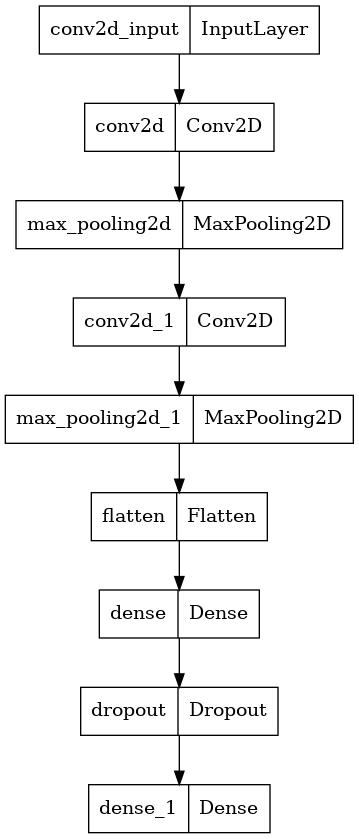

In [8]:
keras.utils.plot_model(model)

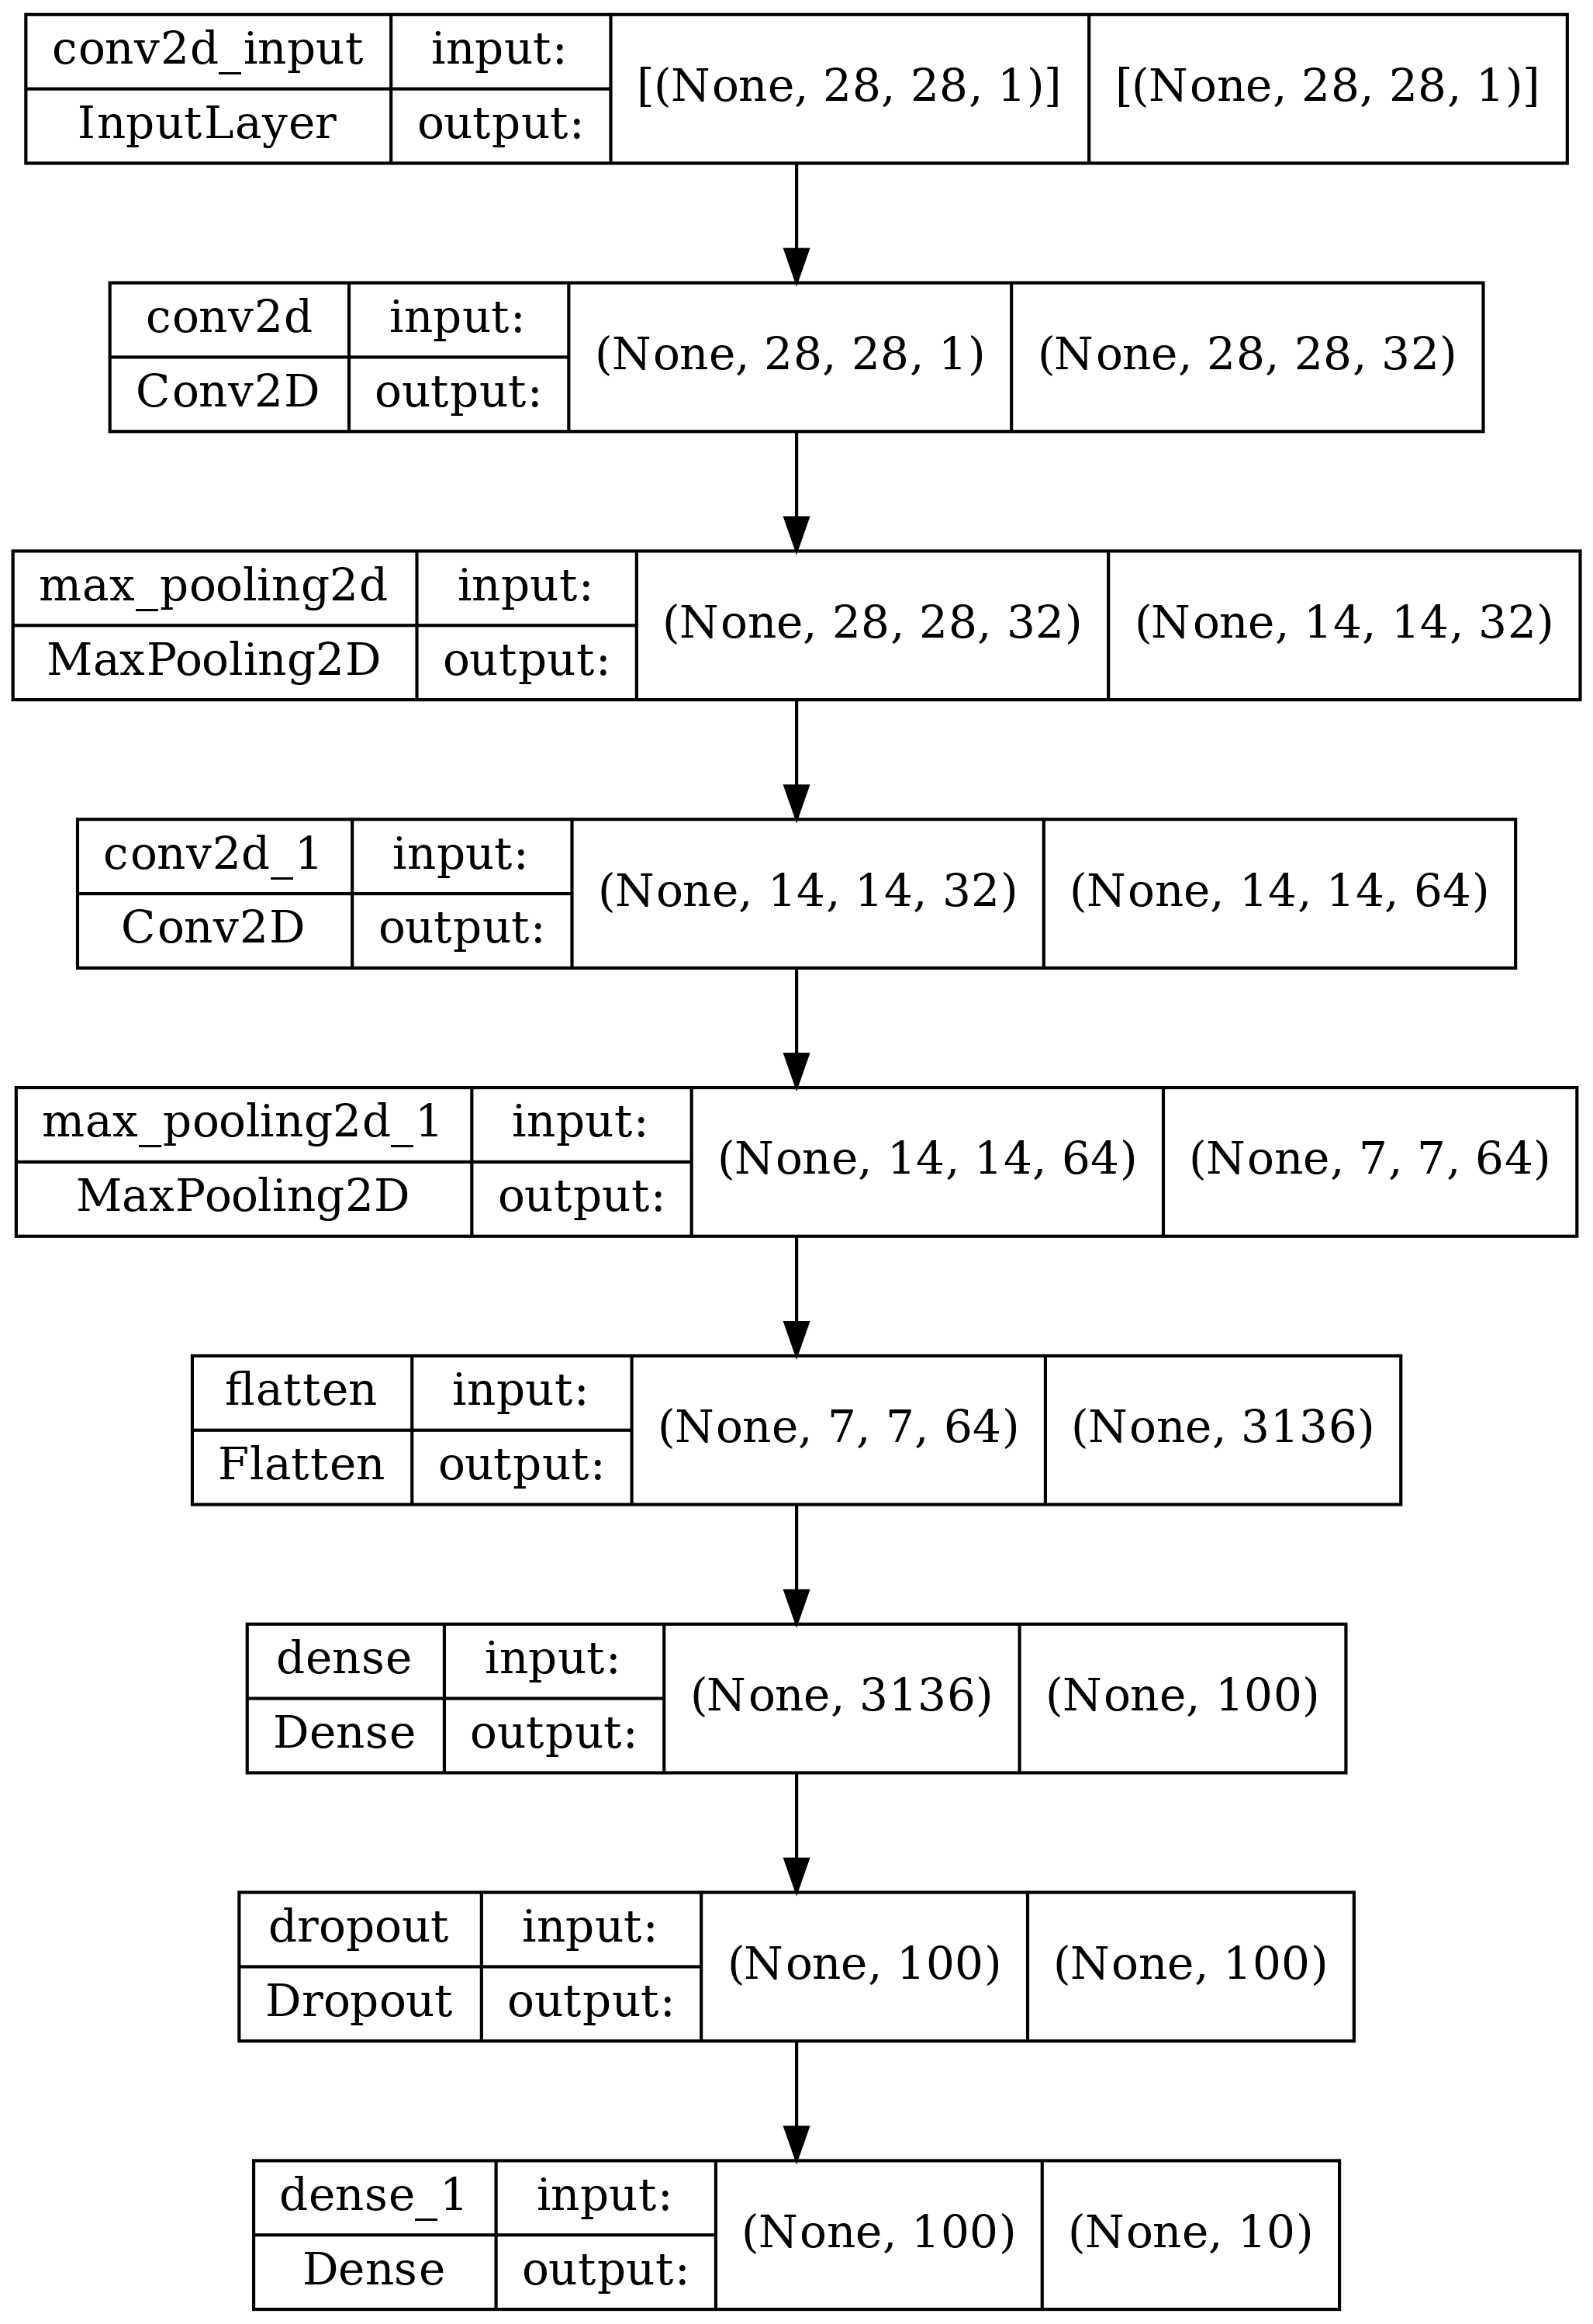

In [9]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

## 모델 컴파일과 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.5234 - accuracy: 0.8113 - val_loss: 0.3425 - val_accuracy: 0.8736
Epoch 2/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3546 - accuracy: 0.8704 - val_loss: 0.2819 - val_accuracy: 0.8951
Epoch 3/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3018 - accuracy: 0.8909 - val_loss: 0.2688 - val_accuracy: 0.9005
Epoch 4/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2730 - accuracy: 0.9005 - val_loss: 0.2468 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2486 - accuracy: 0.9091 - val_loss: 0.2375 - val_accuracy: 0.9143
Epoch 6/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2302 - accuracy: 0.9150 - val_loss: 0.2304 - val_accuracy: 0.9165
Epoch 7/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2124 - accuracy: 0.9209 - val_loss: 0.2253 -

In [11]:
import matplotlib.pyplot as plt

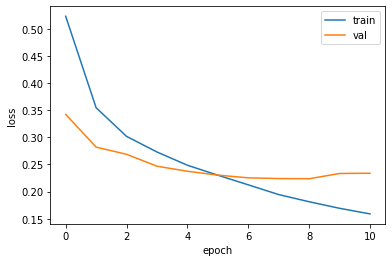

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2236 - accuracy: 0.9207


[0.22364725172519684, 0.9206666946411133]

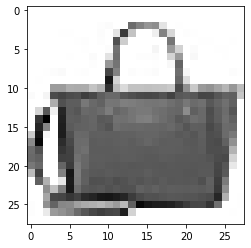

In [14]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[9.0732604e-19 3.0975949e-24 7.7070903e-23 3.4885638e-20 5.1285900e-22
  7.0805287e-21 4.8658010e-19 2.0297387e-18 1.0000000e+00 5.6662979e-21]]


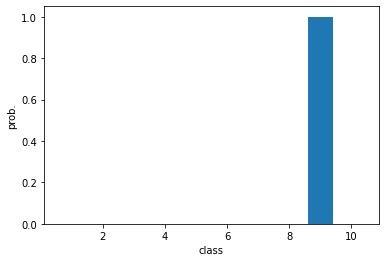

In [16]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 7ms/step - loss: 0.2454 - accuracy: 0.9143


[0.24541138112545013, 0.9143000245094299]